In [1]:
import yfinance as yf

# Download historical data for Apple (AAPL) from Yahoo Finance
data = yf.download("AAPL", start="2010-01-01", end="2023-03-26")

# Print the first 5 rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505279  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516527  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412874  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401019  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443574  447610800


[*********************100%***********************]  1 of 1 completed


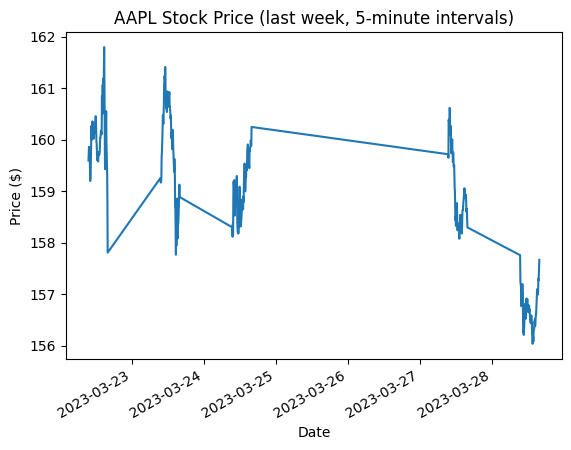

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download the data for the last week, in 5-minute intervals
data = yf.download("AAPL", period="1wk", interval="5m")

# Plot the closing price
data['Close'].plot()
plt.title('AAPL Stock Price (last week, 5-minute intervals)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the data
df = yf.download("AAPL", period="1wk", interval="5m")

# Preprocess the data
df['Close_diff'] = df['Close'].diff()
df = df.dropna()

# Number of lags to use. lag 
n_lags = 10

# Create lagged features
for i in range(1, n_lags+1):
    df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)


# Split the data into training and testing sets
X = df.drop(['Close', 'Close_diff'], axis=1)
y = np.where(df['Close_diff'] > 0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fill in missing values with the mean
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


[*********************100%***********************]  1 of 1 completed


C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\3057716327.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test set and evaluate the performance
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        37
           1       1.00      0.02      0.05        41

    accuracy                           0.49        78
   macro avg       0.74      0.51      0.35        78
weighted avg       0.75      0.49      0.33        78



In [5]:
# Trying to increase the accuracy of the model by adding more data

# Load the data
df = yf.download("AAPL", period="1y", interval="1d")

print(df.head())


# Preprocess the data
df['Close_diff'] = df['Close'].diff()
df = df.dropna()

# Number of lags to use.
n_lags = 10

# Create lagged features
for i in range(1, n_lags+1):
    df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)


# Split the data into training and testing sets
X = df.drop(['Close', 'Close_diff'], axis=1)
y = np.where(df['Close_diff'] > 0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fill in missing values with the mean
imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)


# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-29  176.690002  179.009995  176.339996  178.960007  177.882446   
2022-03-30  178.550003  179.610001  176.699997  177.770004  176.699615   
2022-03-31  177.839996  178.029999  174.399994  174.610001  173.558655   
2022-04-01  174.029999  174.880005  171.940002  174.309998  173.260452   
2022-04-04  174.570007  178.490005  174.440002  178.440002  177.365585   

               Volume  
Date                   
2022-03-29  100589400  
2022-03-30   92633200  
2022-03-31  103049300  
2022-04-01   78751300  
2022-04-04   76468400  


C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\1411473490.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\1411473490.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df.loc[:, 'Close_diff'].shift(i)
C:\Users\pouya\AppData\Local\Temp\ipykernel_8552\1411473490.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [6]:
# Feature name list
feature_names = X.columns
print(feature_names)

Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10'],
      dtype='object')


In [7]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test set and evaluate the performance
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.85      0.62        20
           1       0.80      0.40      0.53        30

    accuracy                           0.58        50
   macro avg       0.64      0.62      0.58        50
weighted avg       0.67      0.58      0.57        50



[[17  3]
 [18 12]]


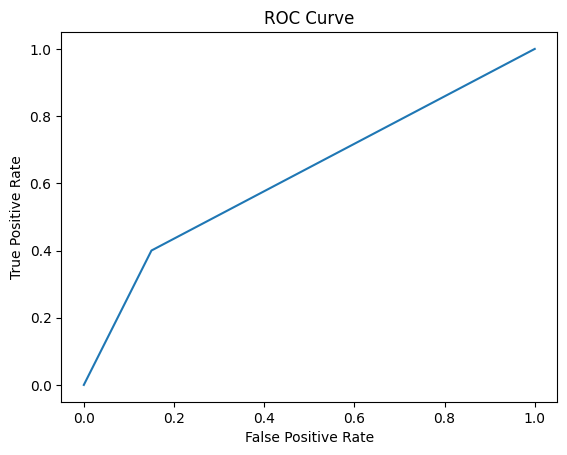

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [9]:
# Test the model on a realworld data
import numpy as np

# Define the feature names
feature_names = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# So, we need to add 9 more features to the feature vector, using the same values as the last feature in the feature vector. These changes  
# Or if we don't want to add 0's, we can use the mean of the feature vector to fill in the missing values

# Define the feature vector as a numpy array
new_data = np.array([133.5, 135.2, 182.5, 134.2, 134.2, 89347166, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# Reshape the feature vector
new_data = new_data.reshape(1, -1) 

# Scale the feature vector
new_data_scaled = scaler.transform(new_data)

# Make a prediction using the trained model
prediction = rf.predict(new_data_scaled)

print(f"Prediction: {prediction}")

Prediction: [0]


In [ ]:
# Another way to solve the shape problem is to use different scalers
test_data_scaler = 

In [11]:
# Get the feature importances from the trained model
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the feature names from the original dataset
original_feature_names = df.columns[:-1]

# Create a list of the new feature names
new_feature_names = [original_feature_names[i] for i in sorted_indices]

# Define the test data with the new feature names
new_data = np.array([133.5, 135.2, 132.5, 134.2, 134.2, 89347166])
new_data_dict = dict(zip(original_feature_names, new_data))
new_data_sorted = [new_data_dict[feature_name] for feature_name in new_feature_names]
new_data_scaled = scaler.transform([new_data_sorted])

# Make a prediction using the trained model
prediction = rf.predict(new_data_scaled)

print(f"Prediction: {prediction}")


KeyError: 'Close_diff'